# Exercise 11: The beauty of kNN

In this exercise, you'll gain practice working with kNN. We'll use the [diamonds](https://ggplot2.tidyverse.org/reference/diamonds.html) dataset, which comes as part of `ggplot2`. This dataset provides information on the quality and price of 50,000 diamonds


## 1. Data, Plotting, and Train/Test Sets (2 pts)
-----
* Load the the `class` and `tidyverse` packages.
* Assign the `diamonds` data set to a simpler name. Then, create a new variable `price_bin` that splits the `price` variable into a binary variable, where 1 indicates that the diamond costs greater than the mean price, and 0 indicates that the diamond costs less than the mean price. Set `price_bin` to be a factor. (*Hint: use the if_else() function*)
* Select just the `carat`, `depth`, `table`, `x`, `y`, and your new `price_bin` variables
* Print the first few lines of the data set
* Print the dimensions of the data set


In [16]:
# INSERT CODE HERE
library(tidyverse)
library(dplyr)
library(ggplot2)

dat <- diamonds %>% drop_na()

# Calculate the mean price
mean_price <- mean(dat$price)

# Create a new variable price_bin
dat$price_bin <- factor(ifelse(dat$price > mean_price, 1, 0))

# Check the levels of the price_bin variable
levels(dat$price_bin)
head(dat)

[1] "0" "1"

carat,cut,color,clarity,depth,table,price,x,y,z,price_bin
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<fct>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43,0
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31,0
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31,0
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63,0
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75,0
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48,0


### Plot
Create a scatterplot of the link between `carat` and `depth`, and use the `color` aesthetics mapping to differentiate between diamonds that cost above versus below the mean price. 

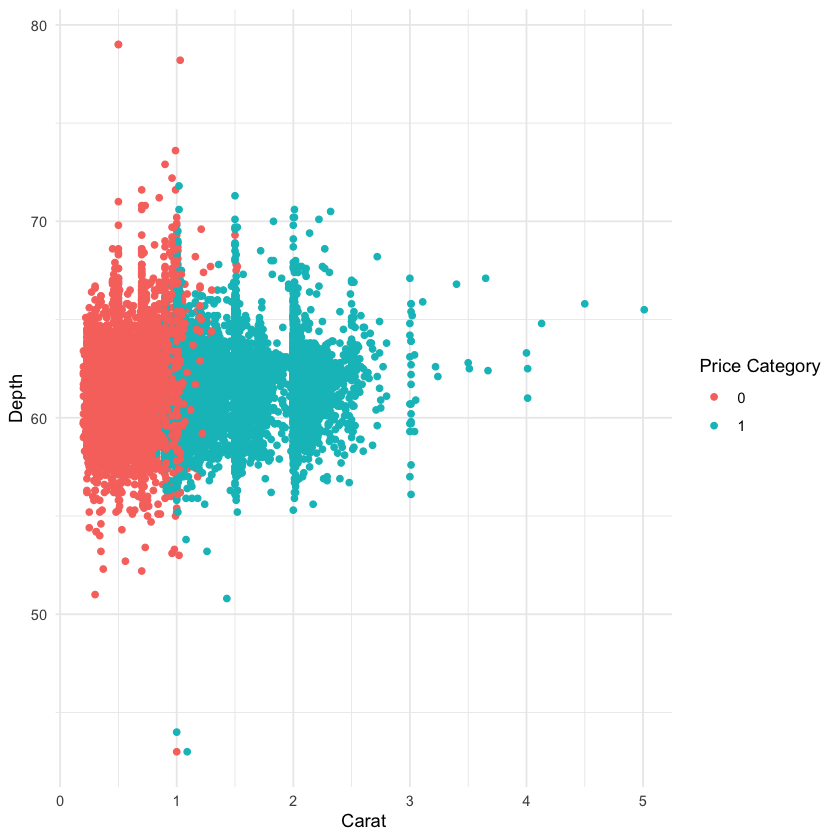

In [17]:
# INSERT CODE HERE
# Create the scatterplot with color aesthetic mapping
ggplot(dat, aes(x = carat, y = depth, color = price_bin)) +
  geom_point() +
  labs(x = "Carat", y = "Depth", color = "Price Category") +
  theme_minimal()

Based on the above scatterplot, how do you think kNN will perform using only these two variables to predict diabetes diagnosis? Which variable, carat or depth, gives us the most information about which price class the diamond will belong to?
> * *Write response here*
>
> * I think KNN would perform rather well because there is a somewhat clear visual boundary between along the x-axis. Carat gives us the most information about which price class the diamond will belong to.


### Test vs Train

Before we run KNN on these data, we need to set aside a portion of the observations as our test set. Below, randomly divide the data such that 30% are allotted to the `test` set and the rest are allotted to the `train` set. Print the first few lines of each set, and print the dimensions of each set to double check your division of the data.

In [18]:
set.seed(2023)

# INSERT CODE HERE

#pull random sample of 30 row indices for test
test.inds <- sample(1:nrow(dat),30)

# TRUE/FALSE indicator for whether each observation is a test item or not. 
cat("All")
dat$is.test <- 1:nrow(dat) %in% test.inds 
head(dat)

#training data pulls the "not test" rows
#Train predictors, pred = predictors
cat("Training")
train.preds = dat[-test.inds, names(dat) != "price_bin"]
head(train.preds)
train.spec <- dat$price_bin[-test.inds]

#testing data pulls the test rows
cat("Test")
test.preds <- dat[test.inds, names(dat) != "price_bin"]
head(test.preds)

All

carat,cut,color,clarity,depth,table,price,x,y,z,price_bin,is.test
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<lgl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43,0,FALSE
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31,0,FALSE
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31,0,FALSE
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63,0,FALSE
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75,0,FALSE
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48,0,FALSE


Training

carat,cut,color,clarity,depth,table,price,x,y,z,is.test
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<lgl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43,FALSE
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31,FALSE
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31,FALSE
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63,FALSE
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75,FALSE
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48,FALSE


Test

carat,cut,color,clarity,depth,table,price,x,y,z,is.test
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<lgl>
1.22,Ideal,G,VVS2,62.3,56.0,10038,6.81,6.84,4.25,TRUE
1.57,Ideal,G,VVS2,62.3,56.0,15144,7.48,7.41,4.64,TRUE
1.11,Very Good,J,SI1,62.4,57.7,4316,6.57,6.64,4.12,TRUE
0.42,Ideal,F,VVS2,60.6,57.0,1142,4.82,4.85,2.93,TRUE
0.32,Ideal,D,SI1,62.6,55.0,756,4.39,4.36,2.74,TRUE
0.90,Premium,G,VS1,62.7,58.0,4661,6.06,6.15,3.83,TRUE


## 2: KNN (3 points)
----
Now, use the `knn()` function from the `class` library to predict `price_bin` from the `carat` and `depth`. Set `k = 3`. 

*Hint: Review the format required for the arguments of knn()*

In [19]:
set.seed(2023)
# INSERT CODE HERE
library(class)

#run knn, returns predictions (specifications)
test.spec.knn <- knn(train.preds, test.preds, train.spec, k = 3)

Warning message in knn(train.preds, test.preds, train.spec, k = 3):
“NAs introduced by coercion”
Warning message in knn(train.preds, test.preds, train.spec, k = 3):
“NAs introduced by coercion”


ERROR: Error in knn(train.preds, test.preds, train.spec, k = 3): NA/NaN/Inf in foreign function call (arg 6)


Now, output a confusion matrix and calculate the test error to evaluate model performance. 

In [ ]:
# INSERT CODE HERE


How did your model perform?
> * Write your response here
>
> * The model performs well with a test accuracy of about 0.95 and a test error of 0.05.


Let's try to improve our model by adding all of the other variables in our data set as predictors. Rerun your `knn()` below, keeping `k = 3`. Again, output a confusion matrix and error rate for your updated model fit.

In [ ]:
set.seed(2023)
# INSERT CODE HERE


Did your model predictions improve?
> * Write your response here
>
> * 


# 3: for loop (3 points)
----

So adding additional predictors didn't shift our error much. Let's see if adjusting `k` has a larger impact on model accuracy. 

Using your initial model above with just `carat` and `depth`, run a `for loop` that runs the same model 30 times, for `k = 1:30`. 

Output a data frame that has `k` and the overall `error` as columns.

The structure of the output data frame and `for loop` are provided for you below. Note that your loop will take a minute or two to run because there are so many observations in the dataset. It may be helpful while you are writing and testing your loop to run it on a subset of the data with only a handful of rows.

In [ ]:
# this is provided
# setting up empty table to store for loop output
output  <- data.frame(k = seq(1:30),
                     error = rep(NA, 30))
head(output)

In [ ]:
for (k in seq(1:30)) {
    knn_fits  <- # your knn function here
    
    #overall error
    conf_df  <- # data frame of test predictions versus actual test
    output$error[k]  <- #calculate error from conf_df and add to your output dataframe
   
}
head(output)

Create a line plot of your `output` object using `ggplot`. Add a (non-linear) `geom_smooth` layer. 

In [ ]:
# INSERT CODE HERE

Interpret your plot. What would you select as the best value of `k`? How much does this improve your test error?
> * *Write your response here*
>
> * 


# 4: Standardizing predictors (2)
-----

Because knn is based on distances between points, it is very sensitive to the scale of your variables. Looking at our predictor variables, we can see that `carat` and `depth` are orders of magnitude different in terms of scales. Maybe we can improve our fit even more by addressing this!

Below, use the `scale()` function to standardize your predictors. (Note that you don't need to standardize `price_bin`.)

Then, run your model a final time with your standardized predictors (just `carat` and `depth` still). Set `k` to the optimal value you determined in your plot above. Output the confusion matrix and error rate again.

In [ ]:
set.seed(2023)
#INSERT CODE HERE


What impact did rescaling the data have on your error rate?
> * *Write response here*
>
> * 


**DUE:** 5pm March 20, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*
>
>
